# Parameter Analysis

Please refer to https://www.youtube.com/watch?v=1JmZ5idFcVI&ab_channel=ChiDotPhi

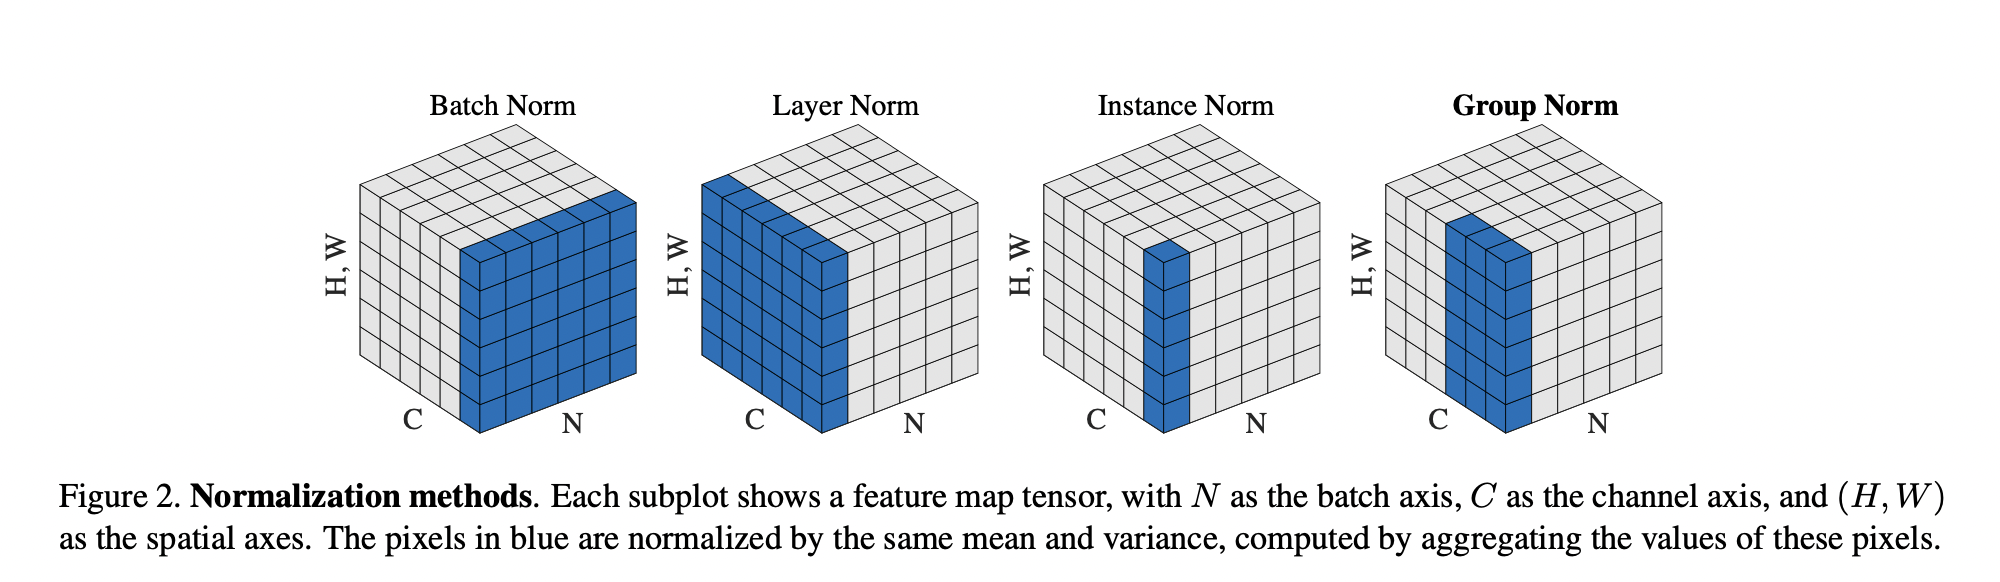

The number of computed mean and std dev are different for each of these:

BN: C

LN: N (Not stored)

IN: C*N (Not stored)

GN: nG*N

------------------------
But the number of actual parameters are the learnable (or not learnable, check doc for more info) shift parameters after normalization (gamma and beta):


BN: 1 gamma and beta per Channel

LN: 1 gamma, beta per dimension (N,C,H,W) thus the increase in number of parameters

GN: 1 gamma and beta per Channel (for any number of groups) Thus the number of params stay same with BN

IN: No params

------------------------
Please have a look at the documentation for each (affine hyperparameters and number of calculated parameters) for more details.

We also check the trainable parameters below using the state_dict method.

In [1]:
import torch
import numpy as np

In [2]:
inp = torch.zeros(2,2,2,2)
inp[0,0,:,:] = torch.eye(2)
inp[0,1,:,:] = 2*torch.eye(2)
inp[1,0,:,:] = 2*torch.eye(2)
inp[1,1,:,:] = 3*torch.eye(2)
print(inp)

tensor([[[[1., 0.],
          [0., 1.]],

         [[2., 0.],
          [0., 2.]]],


        [[[2., 0.],
          [0., 2.]],

         [[3., 0.],
          [0., 3.]]]])


In [4]:
bn = torch.nn.BatchNorm2d(2, momentum=1)
print(bn(inp))

tensor([[[[ 0.3015, -0.9045],
          [-0.9045,  0.3015]],

         [[ 0.5773, -0.9622],
          [-0.9622,  0.5773]]],


        [[[ 1.5075, -0.9045],
          [-0.9045,  1.5075]],

         [[ 1.3471, -0.9622],
          [-0.9622,  1.3471]]]], grad_fn=<NativeBatchNormBackward0>)


In [12]:
bn.eval()
bn(inp)

tensor([[[[ 0.2820, -0.8461],
          [-0.8461,  0.2820]],

         [[ 0.5401, -0.9001],
          [-0.9001,  0.5401]]],


        [[[ 1.4102, -0.8461],
          [-0.8461,  1.4102]],

         [[ 1.2601, -0.9001],
          [-0.9001,  1.2601]]]], grad_fn=<NativeBatchNormBackward0>)

In [5]:
bn.state_dict()

OrderedDict([('weight', tensor([1., 1.])),
             ('bias', tensor([0., 0.])),
             ('running_mean', tensor([0.7500, 1.2500])),
             ('running_var', tensor([0.7857, 1.9286])),
             ('num_batches_tracked', tensor(1))])

In [19]:
inp

tensor([[[[1., 0.],
          [0., 1.]],

         [[2., 0.],
          [0., 2.]]],


        [[[2., 0.],
          [0., 2.]],

         [[3., 0.],
          [0., 3.]]]])

In [17]:
gn = torch.nn.GroupNorm(2,2)
gn(inp)

tensor([[[[ 1.0000, -1.0000],
          [-1.0000,  1.0000]],

         [[ 1.0000, -1.0000],
          [-1.0000,  1.0000]]],


        [[[ 1.0000, -1.0000],
          [-1.0000,  1.0000]],

         [[ 1.0000, -1.0000],
          [-1.0000,  1.0000]]]], grad_fn=<NativeGroupNormBackward0>)

In [18]:
gn.state_dict()

OrderedDict([('weight', tensor([1., 1.])), ('bias', tensor([0., 0.]))])

In [9]:
ln = torch.nn.LayerNorm([2,2,2])
ln(inp)

tensor([[[[ 0.3015, -0.9045],
          [-0.9045,  0.3015]],

         [[ 1.5075, -0.9045],
          [-0.9045,  1.5075]]],


        [[[ 0.5773, -0.9622],
          [-0.9622,  0.5773]],

         [[ 1.3471, -0.9622],
          [-0.9622,  1.3471]]]], grad_fn=<NativeLayerNormBackward0>)

In [11]:
ln.state_dict()

OrderedDict([('weight',
              tensor([[[1., 1.],
                       [1., 1.]],
              
                      [[1., 1.],
                       [1., 1.]]])),
             ('bias',
              tensor([[[0., 0.],
                       [0., 0.]],
              
                      [[0., 0.],
                       [0., 0.]]]))])

In [20]:
inn = torch.nn.InstanceNorm2d(2)
inn(inp)

tensor([[[[ 1.0000, -1.0000],
          [-1.0000,  1.0000]],

         [[ 1.0000, -1.0000],
          [-1.0000,  1.0000]]],


        [[[ 1.0000, -1.0000],
          [-1.0000,  1.0000]],

         [[ 1.0000, -1.0000],
          [-1.0000,  1.0000]]]])

In [21]:
inn.state_dict()

OrderedDict()